# Demo Algo


Copyright (c) 2016 Bernoullio

----

This demo algo illustrates the basic structure of an algorithm. 

This includes:
- Basic imports
- Algo definitions (`initialize`, `handle_data`, `analyze`)
- Further performance analyzes

Bernoullio Lab is built on [Jupyter](http://jupyter.org/). It also extends the open-source trading engine [Zipline](http://www.zipline.io/).

Visit the respective documentations for further reference.



In [4]:
import warnings
warnings.filterwarnings("ignore")

import toolbox
import zipline
%load_ext zipline

The zipline extension is already loaded. To reload it, use:
  %reload_ext zipline


In [6]:
%%zipline --start 2016-6-1 --end 2016-7-28 --bundle bid_ask_stream --data-frequency minute -o performance.pickle

import talib
from zipline.api import record, history, symbol
import logging
from toolbox.broker import SimuBroker

logging.basicConfig(level=logging.DEBUG)

perf_data = None

# initialize algorithm
def initialize(context):
    context.broker = SimuBroker(context)
    context.blotter = context.broker.blotter
    context.sym = symbol("EURUSD")
    context.i = 0
    
def handle_data(context, data):
    # Skip first 4500 minutes to get full windows
    context.i += 1
    if context.i < 4500:
        return

    # Compute averages
    # history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.sym, 'price', 1500, '1m').mean()
    long_mavg = data.history(context.sym, 'price', 4500, '1m').mean()

    # Trading logic
    if short_mavg > long_mavg:
        context.broker.create_order(context.sym, 5000)
    elif short_mavg < long_mavg:
        context.broker.create_order(context.sym, -5000)

    # Save values for later inspection
    record(EURUSD=data.current(context.sym, "price"),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

import matplotlib.pyplot as plt

def analyze(context, perf):
    # Do additional things to the last context and perf DataFrame
    pass


,EURUSD,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-06-01 20:00:00,NaN,NaN,0.000000,NaN,0.001135,NaN,NaN,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,1,[],0.0185
2016-06-02 20:00:00,NaN,0.000000,0.000000,0.000000,0.003963,0.018966,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,2,[],0.0181
2016-06-03 20:00:00,NaN,0.000000,0.000000,0.000000,0.001040,0.046796,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,3,[],0.0171
2016-06-06 20:00:00,NaN,0.000000,0.000000,0.000000,0.005942,0.052564,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,4,[],0.0173
2016-06-07 20:00:00,NaN,0.000000,0.000000,0.000000,0.007239,0.045543,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,5,[],0.0172
2016-06-08 20:00:00,NaN,0.000000,0.000000,0.000000,0.010573,0.042486,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,6,[],0.0171
2016-06-09 20:00:00,NaN,0.000000,0.000000,0.000000,0.008837,0.044034,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,7,[],0.0168
2016-06-10 20:00:00,NaN,0.000000,0.000000,0.000000,-0.000420,0.071363,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,8,[],0.0164
2016-06-13 20:00:00,NaN,0.000000,0.000000,0.000000,-0.008531,0.079249,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,9,[],0.0162
2016-06-14 20:00:00,NaN,0.000000,0.000000,0.000000,-0.010315,0.074841,0.000000,0.000000e+00,1.000000e+07,0.000000e+00,...,NaN,0.000000e+00,0,NaN,1.000000e+07,0.000000e+00,0.000000e+00,10,[],0.0162


Populating the interactive namespace from numpy and matplotlib


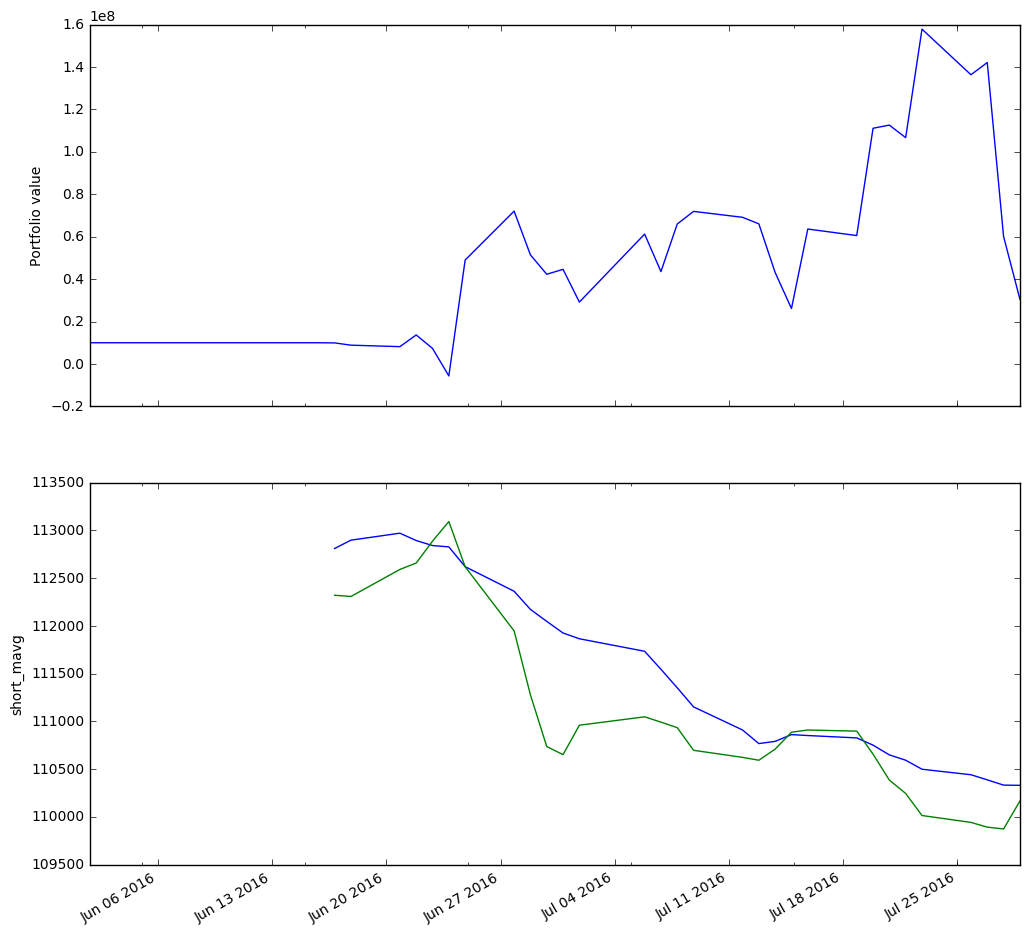

In [7]:
import pandas as pd
data = pd.read_pickle('performance.pickle') # read in perf DataFrame

# start mode to work cleanly with matplotlib figures
%pylab inline 

figsize(12, 12)

# Import our choice graphing library.
# Visit http://matplotlib.org/users/beginner.html for instructions on drawing beautiful graphs
import matplotlib.pyplot as plt

# plot portfolio value
ax1 = plt.subplot(211)
data.portfolio_value.plot(ax=ax1)
ax1.set_ylabel('Portfolio value')

# plot the long and short mavg
ax2 = plt.subplot(212, sharex=ax1)
data.long_mavg.plot(ax=ax2)
ax2.set_ylabel("long_mavg")

ax3 = plt.subplot(212, sharex=ax1)
data.short_mavg.plot(ax=ax3)
ax2.set_ylabel("short_mavg")